In [1]:
import pandas as pd
import numpy as np
from genetic import run_genetic as rg
from my_packs import quantum_potential as qp
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
names
price_df.columns

Index(['S&P 500 COMPOSITE - PRICE INDEX', 'FTSE 100 - PRICE INDEX',
       'DAX 30 PERFORMANCE - PRICE INDEX', 'TOPIX - PRICE INDEX',
       'SHANGHAI SE A SHARE - PRICE INDEX',
       'KOREA SE COMPOSITE (KOSPI) - PRICE INDEX',
       'NIKKEI 225 STOCK AVERAGE - PRICE INDEX',
       'DOW JONES INDUSTRIALS - PRICE INDEX'],
      dtype='object')

In [3]:
five_port_df = pd.read_csv('portfos').set_index('Unnamed: 0')
five_port_df

,S&P,FTS,DAX,TOP,SHA,KOR,NIK,DOW
Unnamed: 0,,,,,,,,
Portfolio 1,16.308637,10.219306,7.489248,11.969375,17.850988,11.272277,7.077368,17.812802
Portfolio 2,17.035900,13.603168,15.996520,1.728056,14.612206,5.852014,11.971540,19.200597
Portfolio 3,10.891266,14.770468,7.443647,16.195590,15.557030,10.198692,15.440291,9.503017
Portfolio 4,16.677185,10.365578,12.096295,9.920928,16.241318,15.939771,7.882755,10.876170
Portfolio 5,18.395195,10.895408,8.458567,10.296766,15.554677,11.086941,10.501105,14.811341


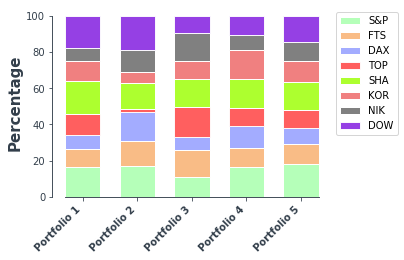

In [9]:
from matplotlib import rc
fig, ax = plt.subplots(figsize=(5,3.5))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

r = [0,1,2,3,4]
df = five_port_df
barWidth = 0.65
names = df.index
# Create green Bars
plt.bar(r, df[df.columns[0]], color='#b5ffb9', edgecolor='white', width=barWidth ,  label=df.columns[0])
plt.bar(r, df[df.columns[1]], bottom=df[df.columns[0]], color='#f9bc86', edgecolor='white', width=barWidth , label=df.columns[1])
plt.bar(r, df[df.columns[2]], bottom=[i+j for i,j in zip(df[df.columns[0]], df[df.columns[1]])], color='#a3acff', edgecolor='white', width=barWidth, label=df.columns[2])
plt.bar(r, df[df.columns[3]], bottom=[i+j+k for i,j,k in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]])], color='#ff4d4d', edgecolor='white', width=barWidth , alpha=0.9 ,  label=df.columns[3])
plt.bar(r, df[df.columns[4]], bottom=[i+j+k+l for i,j,k,l in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]])], color='greenyellow', edgecolor='white', width=barWidth , label=df.columns[4])
plt.bar(r, df[df.columns[5]], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]])], color='lightcoral', edgecolor='white', width=barWidth ,label=df.columns[5] )   
plt.bar(r, df[df.columns[6]], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]])], color='grey', edgecolor='white', width=barWidth ,label=df.columns[6])
plt.bar(r, df[df.columns[7]], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]] , df[df.columns[6]])], color='blueviolet', edgecolor='white', width=barWidth ,alpha=.9 , label=df.columns[7]) 

# Custom x axis
plt.xticks(r, names , fontsize=10, fontweight='black', color = '#333F4B')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Percentage' , fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('fig2.png', dpi=300, bbox_inches='tight', transparent = True)